Let's go through a worked example of exploratory data analysis using data visualisation.

In [1]:
### Load Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings

In [2]:
### Settings for the JupyterLab Notebook
# Set matplotlib to output plots without having to use plt.show()
%matplotlib inline 

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

# Use Seaborn Settings for all plots
sns.set()

# Ignore warnings
warnings.simplefilter('ignore')

In [3]:
### Load Libraries
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


When we tackle a dataset, it's usually a good idea to formulate some questions and then run some plots. But lets start by exploring the data.

In [4]:
# How many records do we have
iris['species'].count()

150

In [5]:
# How many records do we have in each category
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

Let's see if we can plot two of these features in a scatter plot.

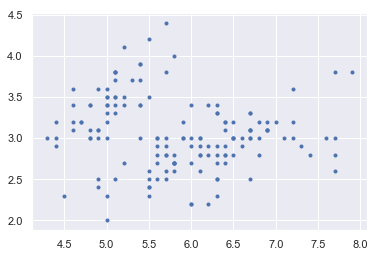

In [6]:
plt.plot(iris['sepal_length'], iris['sepal_width'], marker = '.', linestyle = 'none')

We can use the seaborn library to create a similar plot, but also add histograms which give us an idea of the frequencies for each values.

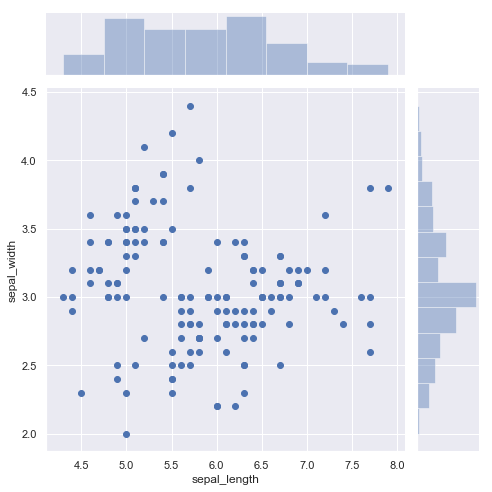

In [7]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris, height = 7)

Ok, this is somewhat useful but it would be helpful to see hings by species. We can use a seaborn facetgrid for this.

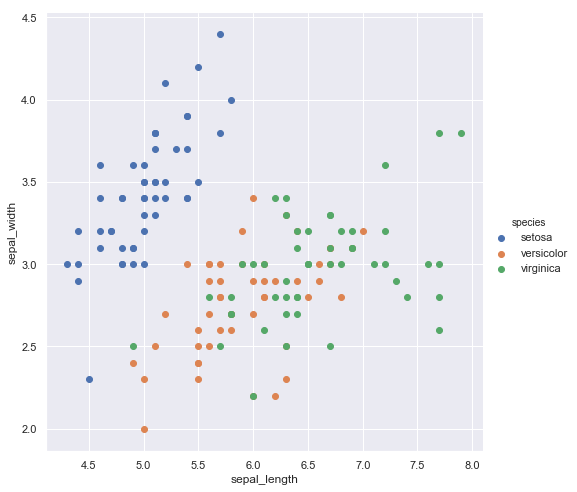

In [8]:
sns.FacetGrid(iris, hue = 'species', height=7) \
    .map(plt.scatter, "sepal_length", 'sepal_width') \
    .add_legend()

We could also look at boxplots to look at individual features.

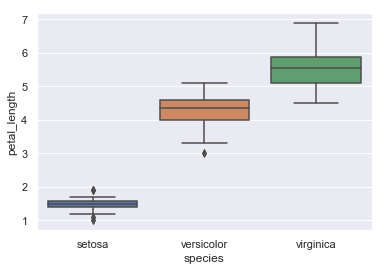

In [9]:
sns.boxplot(x = iris['species'], y = iris['petal_length'])

We can use the subplot feature plot all four features in one go.

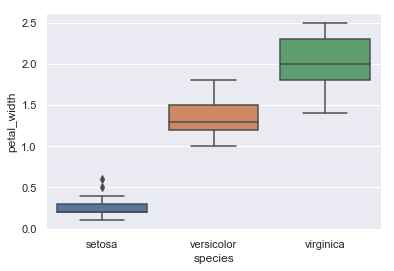

In [10]:
sns.boxplot(x = iris['species'], y = iris['petal_width'])

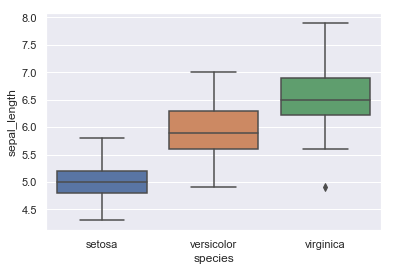

In [11]:
sns.boxplot(x = iris['species'], y = iris['sepal_length'])

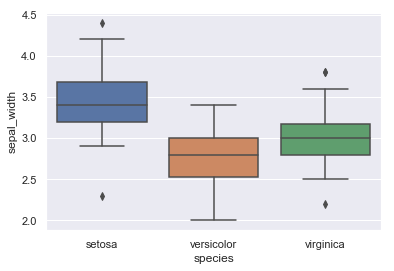

In [12]:
sns.boxplot(x = iris['species'], y = iris['sepal_width'])

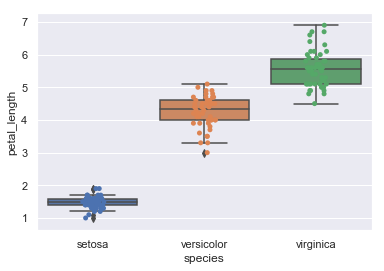

In [16]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

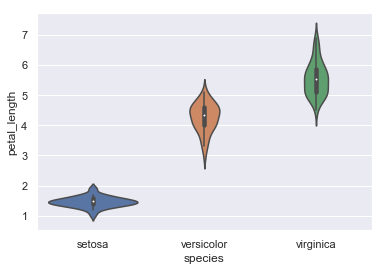

In [13]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

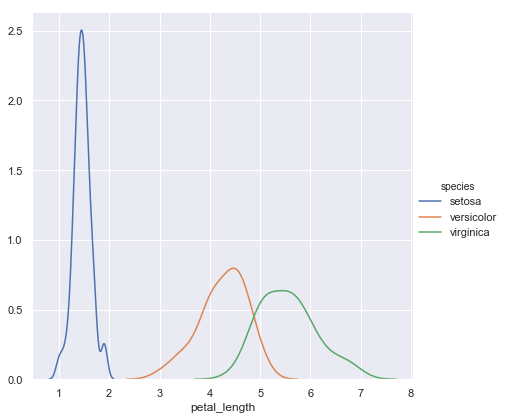

In [14]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()